In [1]:
import pandas as pd
import reshaping_functions as shape
import re

In [2]:
mothership = pd.read_pickle("votes_scraped_over_night_v2.pkl")

### Preprocessing Steps

In [3]:
mothership['description_text'] = mothership['description'].apply(lambda x: shape.find_resume(x))
mothership['date'] = mothership['description'].apply(lambda x: shape.find_date(x))
mothership['description'] = mothership['description'].apply(lambda x: None if x == "no description" else x)

In [4]:
# klima vote / flytrafik
#mothership['description_text'][37]

In [5]:
#241 with missing description
mothership[mothership.isna().any(axis=1)].head(2)


,vote_id,description,votes,votes_by_party,vote_caller,url,description_text,date
12,"Afstemning nr. 245, 2021-22",None,"{'politician': ['Abbas Razvi', 'Aki-Matilda Hø...","{'parties': ['Socialdemokratiet (S)', 'Venstre...","[Finansminister, Nicolai Wammen (S)]",https://www.ft.dk//samling/20211/afstemning/24...,NaN,NaN
59,"Afstemning nr. 263, 2021-22",None,"{'politician': ['Abbas Razvi', 'Aki-Matilda Hø...","{'parties': ['Socialdemokratiet (S)', 'Venstre...","[Udlændinge- og integrationsminister, Mattias ...",https://www.ft.dk//samling/20211/afstemning/26...,NaN,NaN


In [6]:
mothership_clean = mothership.dropna()
mothership_clean.sort_values('date', inplace=True)
mothership_clean.reset_index(inplace=True, drop=True)

C:\Users\COBOD\AppData\Local\Programs\Python\Python39\lib\site-packages\pandas\util\_decorators.py:311: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return func(*args, **kwargs)


In [12]:
#mothership_clean.to_pickle("votes_data_cleaned.pkl")
mothership_clean["year"] = mothership_clean["date"].astype(str).str[:4]
mothership_clean.head(1)

C:\Users\COBOD\AppData\Local\Temp\ipykernel_12044\1550791486.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  mothership_clean["year"] = mothership_clean["date"].astype(str).str[:4]


,vote_id,description,votes,votes_by_party,vote_caller,url,description_text,date,year
0,"Afstemning nr. 2, 2004-05 (1. samling)","[Fremsat:, 07-10-2004, Forslag til vedtagelse:...","{'politician': ['Anders Fogh Rasmussen', 'Ande...","{'parties': ['Venstre (V)', 'Socialdemokratiet...","[Frank Jensen (S), Holger K. Nielsen (SF), Lin...",https://www.ft.dk//samling/20041/afstemning/2.htm,"Idet Folketinget konstaterer,- at aftalen mell...",2004-10-07,2004


<AxesSubplot:xlabel='year'>

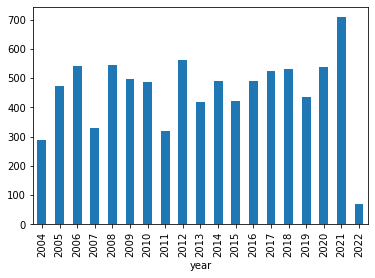

In [13]:
mothership_clean.groupby(["year"])["vote_id"].nunique().plot.bar()

In [6]:
view_mothership = mothership_clean
klimaforandringer = re.compile(r"(K|k)lima(forandringer)?(ne)?")
co2 = re.compile(r"(CO 2)|(CO2)|(kulstof(udledning(en)?)?)|(co2)")
grøn_omstilling = re.compile(r"grøn(ne)? omstilling")


In [7]:
view_mothership['klimaforandringer'] = view_mothership['description_text'].apply(lambda x: 1 if re.search(klimaforandringer, x)!=None else 0)
view_mothership['CO2'] = view_mothership['description_text'].apply(lambda x: 1 if re.search(co2, x)!=None else 0)
view_mothership['grøn_omstilling'] = view_mothership['description_text'].apply(lambda x: 1 if re.search(grøn_omstilling, x)!=None else 0)


/home/gugy/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
/home/gugy/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/home/gugy/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead



In [8]:
view_mothership[(view_mothership.CO2 == 1) | (view_mothership.klimaforandringer==1) | (view_mothership.grøn_omstilling==1)]

,vote_id,description,votes,votes_by_party,vote_caller,url,description_text,date,klimaforandringer,CO2,grøn_omstilling
78,"Afstemning nr. 270, 2004-05 (1. samling)","[Sagsgang:, Fremsat 17-11-2004, 1. behandlet /...","{'politician': ['Anders Fogh Rasmussen', 'Ande...","{'parties': ['Venstre (V)', 'Socialdemokratiet...","[Skatteminister, Kristian Jensen (V)]",https://www.ft.dk//samling/20041/afstemning/27...,Loven indeholder følgende elementer: - CO2-afg...,2004-12-20,0,1,0
95,"Afstemning nr. 264, 2004-05 (1. samling)","[Sagsgang:, Fremsat 07-10-2004, 1. behandlet /...","{'politician': ['Anders Fogh Rasmussen', 'Ande...","{'parties': ['Venstre (V)', 'Socialdemokratiet...","[Skatteminister, Kristian Jensen (V)]",https://www.ft.dk//samling/20041/afstemning/26...,Loven indfører regler om den skattemæssige beh...,2004-12-20,0,1,0
324,"Afstemning nr. 100, 2004-05 (2. samling)","[Fremsat:, 17-05-2005, Forslag til vedtagelse:...","{'politician': ['Allan Niebuhr', 'Anders Fogh ...","{'parties': ['Venstre (V)', 'Socialdemokratiet...","[Steen Gade (SF), Lars Christian Lilleholt (V)...",https://www.ft.dk//samling/20042/afstemning/10...,Folketinget ser det som vigtigt at koble løsni...,2005-05-17,1,0,0
398,"Afstemning nr. 115, 2004-05 (2. samling)","[Sagsgang:, Fremsat 02-03-2005, 1. behandlet /...","{'politician': ['Allan Niebuhr', 'Anders Fogh ...","{'parties': ['Venstre (V)', 'Socialdemokratiet...","[Transport- og energiminister, Flemming Hansen...",https://www.ft.dk//samling/20042/afstemning/11...,"Loven ændrer lov om CO2-kvoter, således at en ...",2005-06-01,0,1,0
415,"Afstemning nr. 124, 2004-05 (2. samling)","[Sagsgang:, Fremsat 02-03-2005, 1. behandlet /...","{'politician': ['Allan Niebuhr', 'Anders Fogh ...","{'parties': ['Venstre (V)', 'Socialdemokratiet...","[Transport- og energiminister, Flemming Hansen...",https://www.ft.dk//samling/20042/afstemning/12...,"Loven ændrer lov om CO2-kvoter, således at en ...",2005-06-01,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...
8588,"Afstemning nr. 137, 2021-22","[Sagsgang:, Fremsat 10-11-2021, 1. behandlet /...","{'politician': ['Abbas Razvi', 'Aki-Matilda Hø...","{'parties': ['Socialdemokratiet (S)', 'Venstre...","[Klima-, energi- og forsyningsminister, Dan Jø...",https://www.ft.dk//samling/20211/afstemning/13...,Formålet med lovforslaget er at fremme udnytte...,2021-12-28,1,0,0
8646,"Afstemning nr. 316, 2021-22","[Fremsat:, 03-03-2022, Forslag til vedtagelse:...","{'politician': ['Aki-Matilda Høegh-Dam', 'Alex...","{'parties': ['Socialdemokratiet (S)', 'Venstre...",[Henning Hyllested (EL)],https://www.ft.dk//samling/20211/afstemning/31...,Regeringen opfordres til at ændre den danske l...,2022-03-03,1,0,1
8647,"Afstemning nr. 318, 2021-22","[Fremsat:, 03-03-2022, Forslag til vedtagelse:...","{'politician': ['Aki-Matilda Høegh-Dam', 'Alex...","{'parties': ['Socialdemokratiet (S)', 'Venstre...","[Carl Valentin (SF), Anders Kronborg (S), Kath...",https://www.ft.dk//samling/20211/afstemning/31...,Folketinget opfatter klimakrisen som en af tid...,2022-03-03,1,0,0
8649,"Afstemning nr. 315, 2021-22","[Fremsat:, 03-03-2022, Forslag til vedtagelse:...","{'politician': ['Aki-Matilda Høegh-Dam', 'Alex...","{'parties': ['Socialdemokratiet (S)', 'Venstre...",[Thomas Jensen (S)],https://www.ft.dk//samling/20211/afstemning/31...,"Folketinget konstaterer, at luftfarten har en ...",2022-03-03,1,0,1


In [ ]:
df = pd.read_pickle("votes_data_cleaned.pkl")


In [52]:
df = df[df.description_text.duplicated() != True]


In [54]:
df.reset_index(drop=True, inplace=True)

In [59]:
df.to_pickle("votes_data_cleaned_V2.pkl")